# 신용카드 고객 Segmentation 
- Machine Learning을 이용한 신용카드 고객 clustering   


- Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata  


- CUSTID: 신용카드 소지자 ID  
- BALANCE: 구매를 위해 고객 계정에 남아 있는 잔액  
- BALANCE_FREQUENCY: 잔액이 업데이트되는 빈도, 0에서 1 사이의 점수(1 = 자주 업데이트, 0 = 자주 업데이트되지 않음)  
- PURCHASES: 계정에서 구매한 금액  
- ONEOFFPURCHASES: 한 번에 완료되는 최대 구매 금액  
- INSTALLMENTS_PURCHASES: 할부 금액  
- CASH_ADVANCE: 현금서비스  
- PURCHASES_FREQUENCY: 구매 빈도, 0에서 1 사이의 점수(1 = 자주 구매, 0 = 자주 구매하지 않음)  
- ONEOFF_PURCHASES_FREQUENCY:한 번에 구매하는 빈도(1 = 자주 구매, 0 = 자주 구매하지 않음)  
- PURCHASES_INSTALLMENTS_FREQUENCY: 설치 시 구매가 수행되는 빈도(1 = 자주 수행, 0 = 자주 수행하지 않음)  
- CASH_ADVANCE_FREQUENCY: 현금 선지급 빈도  
- CASH_ADVANCE_TRX: "선불" 거래 건수  
- PURCHASES_TRX: 구매한 거래 수  
- CREDIT_LIMIT: 사용자 신용카드 한도  
- PAYMENTS: 사용자가 지불한 금액  
- MINIMUM_PAYMENTS: 사용자가 지불하는 최소 금액  
- PRC_FULL_PAYMENT: 사용자가 지불한 전체 결제 비율  
- TENURE: 이용자의 신용카드 서비스 이용기간

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import korean
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/Marketing_data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

기술 통계 파악

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


- ONEOFF_PURCHASES 최대 구매 (40761.25)를 한 고객

In [5]:
df[df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


missing value check

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- `MINIMUM_PAYMENT`의 평균으로 missing value를 보충합니다.

In [7]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

- 누락된 요소를 `CREDIT_LIMIT`의 평균으로 보충합니다.

In [8]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)

In [9]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

- 데이터에 중복된 항목이 있는지 봅니다.

In [10]:
df.duplicated().sum()

0

- Customer ID는여기서 의미가 없으므로 drop 시킵니다.

In [11]:
cust_id = df.pop("CUST_ID")
cust_id

0       C10001
1       C10002
2       C10003
3       C10004
4       C10005
         ...  
8945    C19186
8946    C19187
8947    C19188
8948    C19189
8949    C19190
Name: CUST_ID, Length: 8950, dtype: object

In [12]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

## K-MEANS clustering model 작성

### ELBOW 방법을 사용하여 최적의 클러스터 수 찾기

- 엘보우 방법은 데이터 세트에서 적절한 클러스터 수를 찾는 데 도움이 되도록 설계된 휴리스틱 방법입니다.  
- 꺾은선형 차트가 팔처럼 보이면 팔의 "elbow"에 해당하는 k 값이 가장 좋습니다.  이 지점에서 이전에 비해 클러스터 내부의 데이터들이 더 이상 크게 뭉치지 않기 때문입니다.
- inertia_ 속성 : 가장 가까운 클러스터 중심까지의 샘플 거리의 제곱 합계. 클러스터 내부의 데이터들이 얼마나 뭉쳐있는지를 나타내는 값이므로, 값이 작을수록 클러스터가 잘 형성되었다고 볼 수 있습니다.

- data scaling

In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [15]:
df_scaled.shape

(8950, 17)

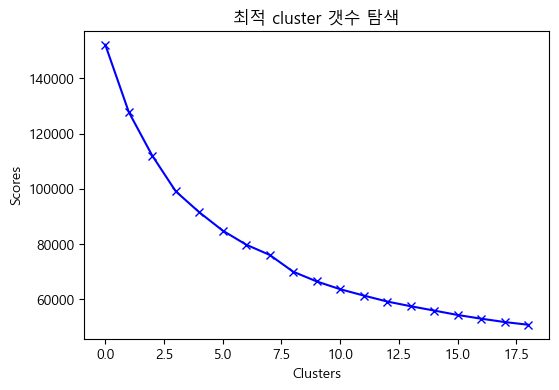

In [16]:
scores = []

# 검사할 클러스터 수의 범위를 지정 (1부터 20까지)
range_values = range(1, 20)

# 지정된 범위의 클러스터 수에 대해 K-means 알고리즘을 적용하고, 
# 각 클러스터 수에 따른 inertia 값을 scores리스트에 추가합니다.
for i in range_values:
    kmeans = KMeans(n_clusters = i)  # i개의 클러스터를 가진 K-means 모델을 생성
    kmeans.fit(df_scaled)  # 생성한 모델로 데이터를 학습
    scores.append(kmeans.inertia_)  # 학습된 모델의 inertia 값을 scores 리스트에 추가

# 각 클러스터 수에 따른 inertia 값을 시각화
plt.figure(figsize=(6, 4))  
plt.plot(scores, 'bx-') 
plt.title('최적 cluster 갯수 탐색')  
plt.xlabel('Clusters')  
plt.ylabel('Scores')
plt.show() 

### K-MEANS METHOD 적용

- cluster 갯수를 8로 결정

In [17]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_
labels

array([1, 3, 4, ..., 7, 7, 7])

In [18]:
kmeans.cluster_centers_.shape

(8, 17)

클러스터의 중심점을 데이터프레임 형태로 변환합니다.   
이 데이터프레임은 각 클러스터의 중심점을 나타내는 값들을 포함하며, 각 열의 이름은 원본 데이터프레임(df)의 열 이름을 사용합니다.

In [19]:
cluster_centers = pd.DataFrame(
                                data = kmeans.cluster_centers_, 
                               columns = [df.columns])
cluster_centers  

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.365243,0.331606,-0.035363,-0.242468,0.361652,-0.363410,0.996306,-0.384086,1.209182,-0.473071,-0.359791,0.190297,-0.259616,-0.215360,-0.051661,0.318351,0.255581
1,0.008920,0.402970,-0.355895,-0.240723,-0.399147,-0.102866,-0.849053,-0.393601,-0.751506,0.088473,-0.038970,-0.480332,-0.305912,-0.252728,-0.007628,-0.456235,0.273873
2,1.055994,0.468427,2.432260,1.771826,2.495934,-0.147328,1.168536,1.535165,1.279606,-0.272765,-0.143949,3.075885,1.274951,1.426513,0.731971,0.238241,0.338098
3,1.661113,0.395864,-0.224570,-0.160754,-0.235727,1.990468,-0.485069,-0.212428,-0.424061,1.918106,1.916249,-0.273347,1.009252,0.789346,0.501940,-0.395590,0.073409
4,-0.142210,0.399947,0.538931,0.668972,0.045094,-0.332281,0.979740,1.905226,0.167605,-0.415524,-0.332939,0.614928,0.426302,0.142182,-0.160035,0.450258,0.269194
5,-0.701658,-2.145970,-0.310492,-0.235061,-0.302190,-0.319655,-0.555665,-0.443555,-0.439875,-0.520844,-0.376103,-0.419517,-0.174483,-0.192557,-0.256490,0.286186,0.199833
6,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
7,-0.333924,-0.345996,-0.288199,-0.214424,-0.287144,0.067515,-0.203348,-0.286554,-0.225256,0.309069,0.000876,-0.387867,-0.563134,-0.392745,-0.209087,0.013378,-3.200691


- 각 value 는 scaling이 되어 있는 상태이므로 inverse transform을 통해 원래의 값으로 복원하면 각 cluster 의 의미 파악에 도움이 됩니다.

In [20]:
inverse_cluster_centers = scaler.inverse_transform(cluster_centers)

pd.DataFrame(data = inverse_cluster_centers, columns = [df.columns])

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,804.252871,0.955825,927.650284,189.990608,738.105202,216.783703,0.890216,0.087878,0.844997,0.040478,0.793516,19.439900,3549.860450,1109.698842,743.812886,0.246827,11.859352
1,1583.040905,0.972731,242.829840,192.885725,50.124334,763.157295,0.149584,0.085039,0.065769,0.152849,2.982884,2.770575,3381.415392,1001.520818,846.429975,0.020274,11.883831
2,3762.436640,0.988237,6199.766676,3533.304973,2668.110055,669.916456,0.959341,0.660427,0.872985,0.080561,2.266484,91.164835,9133.241758,5862.758729,2570.034179,0.223396,11.969780
3,5021.941381,0.971047,523.407554,325.619188,197.902988,5152.975899,0.295669,0.139086,0.195905,0.518977,16.325817,7.915445,8166.521472,4018.224257,2033.955917,0.038011,11.615558
4,1268.475765,0.972014,2154.639937,1702.794093,451.845845,282.061322,0.883568,0.770823,0.431048,0.051994,0.976765,29.994638,6045.511414,2144.746144,491.251746,0.285407,11.877569
5,104.033132,0.368910,339.833890,202.284119,137.801297,308.540548,0.267335,0.070136,0.189620,0.030918,0.682203,4.282203,3859.609699,1175.710861,266.466569,0.237419,11.784746
6,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
7,869.441195,0.795307,387.463654,236.537740,151.406683,1120.452630,0.408737,0.116973,0.274915,0.196992,3.254808,5.068910,2445.535977,596.186218,376.937132,0.157627,7.233974


### 각 datapoint가 어떤 cluster에 속하는지 label 부여
- `fit_predict` 메소드는 각 데이터 포인트가 속하는 클러스터의 인덱스를 배열로 반환합니다. 이 배열에서 각 값은 해당 데이터 포인트가 속한 클러스터를 나타냅니다.

In [21]:
# KMeans 클러스터링 알고리즘을 이용하여 df_scaled 데이터에 대한 클러스터링을 수행합니다.
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([0, 3, 5, ..., 7, 7, 7])

원본 데이터프레임(df)와 클러스터 할당 정보(y_kmeans) 및 고객 ID(cust_id)를 포함하는 새로운 데이터프레임을 결합하여 df_cluster라는 새로운 데이터프레임을 생성합니다.  
이를 통해 각 고객이 어떤 클러스터에 속하는지를 확인할 수 있습니다.

In [22]:
# 원본 데이터프레임(df)와 클러스터링 결과를 포함하는 새로운 데이터프레임을 결합합니다.
df_cluster = pd.concat([df, 
                    pd.DataFrame(
                            {'cluster': y_kmeans,  # 각 데이터 포인트의 클러스터 인덱스
                            'cust_id': cust_id})],  # 고객 ID
                    axis = 1)     # 데이터를 열 방향으로 결합
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,cust_id
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,C10001
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3,C10002
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5,C10003
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0,C10004
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,C10005


## Clustering한 결과를 2차원으로 시각화 하기 위해 PCA 방법 적용

In [23]:
# PCA(주성분 분석)를 이용해 다차원 데이터를 2차원으로 축소합니다.
pca = PCA(n_components=2)

# fit_transform 메소드를 사용해 스케일링된 데이터(df_scaled)에 PCA를 적용합니다.
# PCA 변환을 통해 얻어진 2차원 데이터의 주성분 점수를 저장합니다.
principal_comp = pca.fit_transform(df_scaled)

principal_comp

array([[-1.68221988, -1.07644952],
       [-1.13828982,  2.50646572],
       [ 0.96967928, -0.38350647],
       ...,
       [-0.92620404, -1.81078314],
       [-2.33655126, -0.65796802],
       [-0.55642367, -0.40046869]])

In [24]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076450
1,-1.138290,2.506466
2,0.969679,-0.383506
3,-0.873630,0.043174
4,-1.599433,-0.688583


- 클러스터 레이블을 데이터 프레임에 연결

In [25]:
# PCA 데이터프레임에 labels에 저장된 클러스터 라벨을 'cluster'라는 새로운 컬럼으로 pca_df에 추가
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076450,1
1,-1.138290,2.506466,3
2,0.969679,-0.383506,4
3,-0.873630,0.043174,1
4,-1.599433,-0.688583,1


### PCA 축소 결과와 클러스터 라벨을 이용해 산점도를 그립니다.

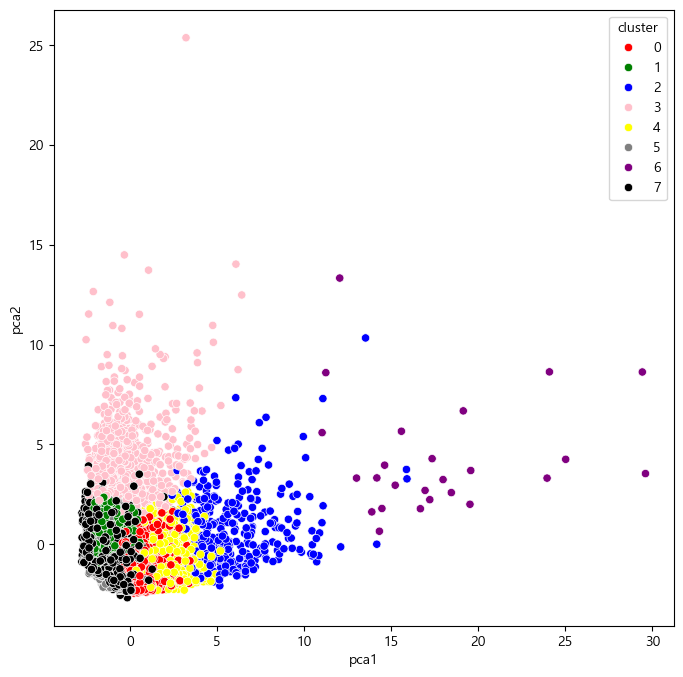

In [26]:
plt.figure(figsize=(8, 8))
# 'hue' 매개변수에 'cluster'를 지정하여 각 클러스터를 다른 색으로 구분
# 'palette'를 통해 클러스터별로 사용할 색상을 지정
sns.scatterplot(x="pca1", y="pca2", 
                hue="cluster", data=pca_df, 
                palette=['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

- cluster 4 에 속하는 고객 정보

In [27]:
df_cluster = df_cluster[df_cluster['cluster'] == 4]
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,cust_id
5,1809.828751,1.0,1333.28,0.00,1333.28,0.0,0.666667,0.000000,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.000000,12,4,C10006
7,1823.652743,1.0,436.20,0.00,436.20,0.0,1.000000,0.000000,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.000000,12,4,C10008
10,1293.124939,1.0,920.12,0.00,920.12,0.0,1.000000,0.000000,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.000000,12,4,C10011
12,1516.928620,1.0,3217.99,2500.23,717.76,0.0,1.000000,0.250000,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.250000,12,4,C10013
13,921.693369,1.0,2137.93,419.96,1717.97,0.0,0.750000,0.166667,0.750000,0.0,0,26,7500.0,1655.891435,251.137986,0.083333,12,4,C10014


### 각 column의 분포를 시각화

In [28]:
df_cluster.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'cluster', 'cust_id'],
      dtype='object')

In [29]:
# df_cluster 데이터프레임에서 마지막 두 컬럼을 제외한 모든 컬럼을 선택합니다.
# 이 때, columns 변수는 선택된 컬럼의 이름들을 담고 있습니다.
columns = df_cluster.columns[:-2]

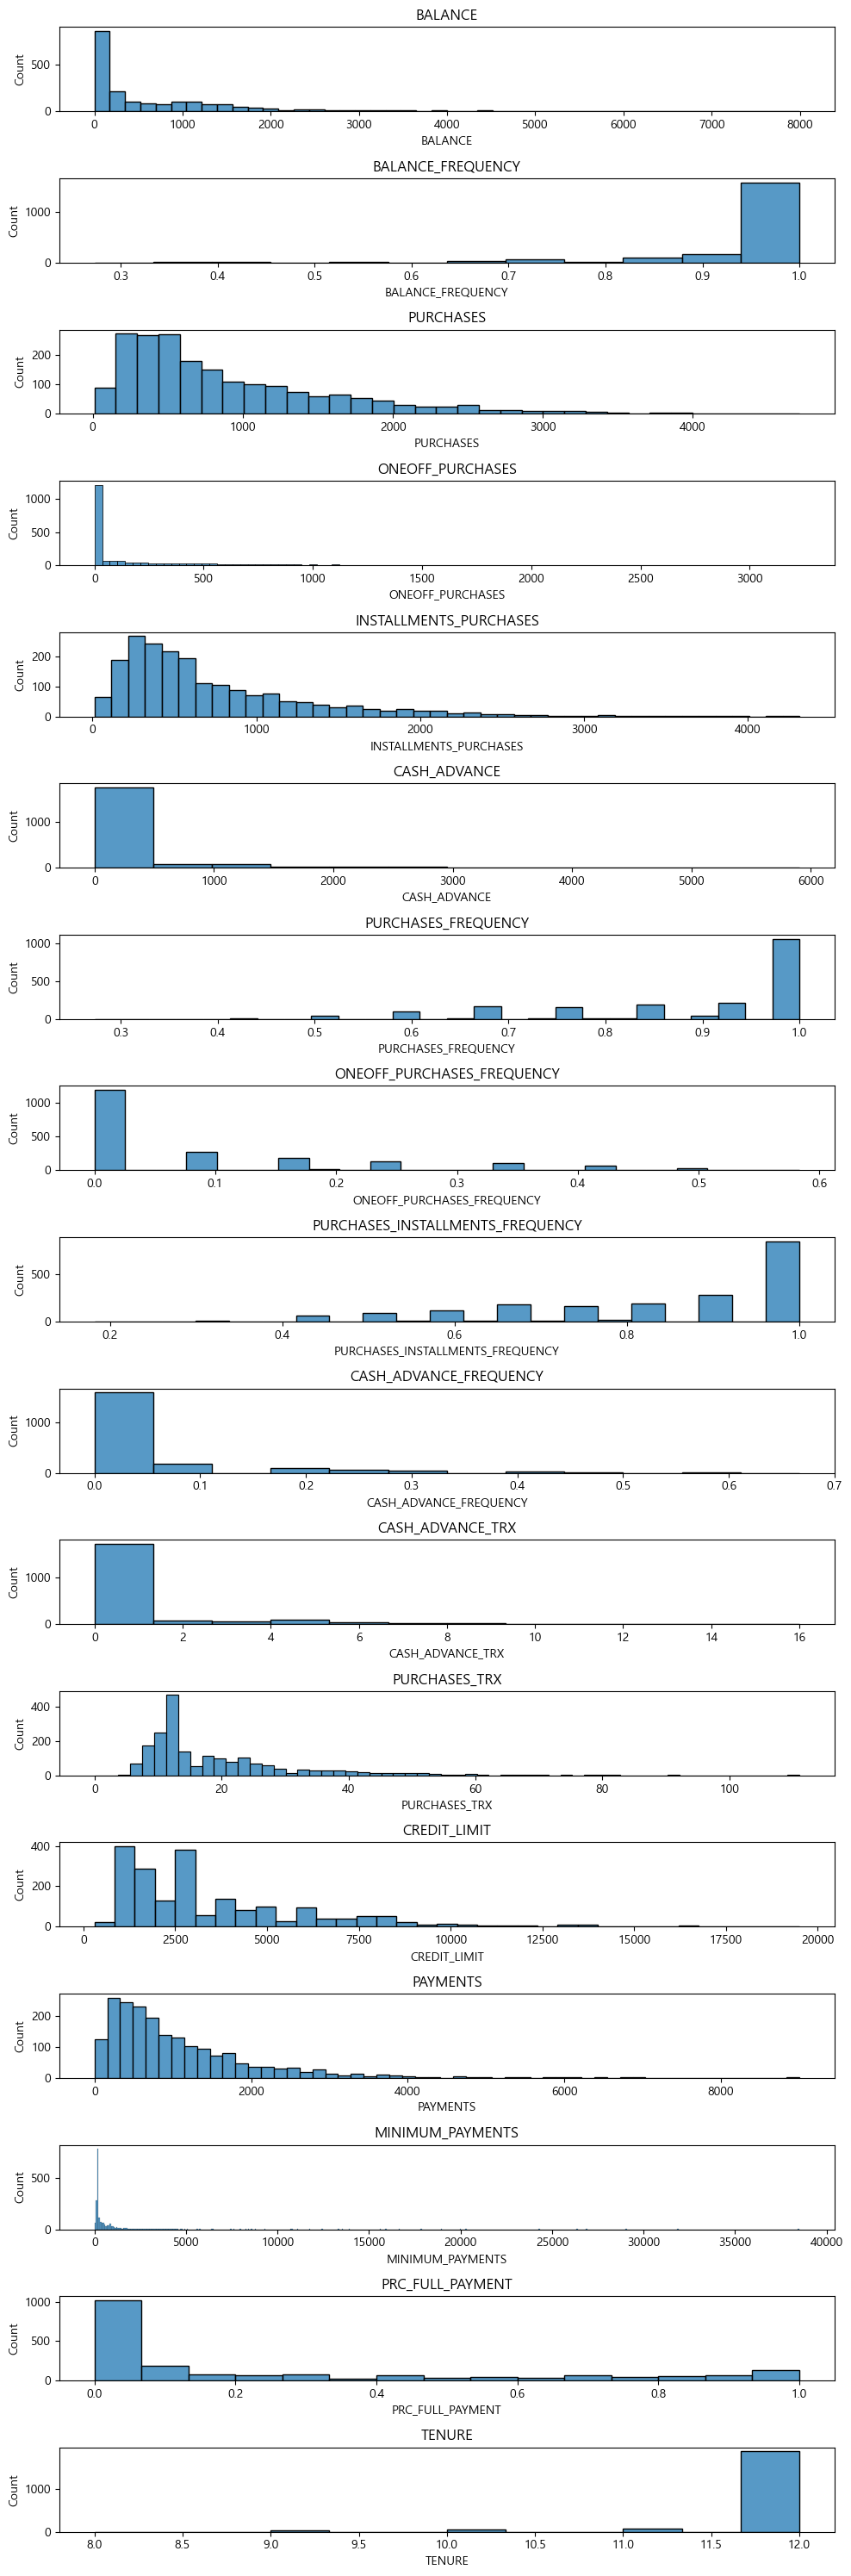

In [30]:
plt.figure(figsize=(10,30))
# 'columns'에 저장된 각 컬럼에 대해 반복문을 실행
for i in range(len(columns)):
    # len(columns)만큼의 서브플롯을 생성하며, 각각의 서브플롯에 하나의 컬럼에 대한 히스토그램을 그립니다.
    plt.subplot(len(columns), 1, i+1)
    # df_cluster 데이터프레임의 현재 컬럼에 대한 히스토그램을 그립니다.
    sns.histplot(df_cluster[columns[i]]) 
    # 각 서브플롯의 제목을 현재 컬럼의 이름으로 설정
    plt.title(columns[i])
plt.tight_layout()